# Ejercicios de Practica

En este cuaderno se realizarán una serie de ejercicios de visualización y descripción de datos utilizando el conjunto de datos de 120 años de historia olímpica, adquirido por Randi Griffin. Sin embargo, antes de proceder, prepararemos el entorno de trabajo y definiremos una función que será de utilidad más adelante:

In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
flierprops = dict(marker='o', color='black', markersize=1, linestyle='none')

In [2]:
def medal(x):
    if pd.isna(x):
        y = 0
    else:
        y = 1
    return y

## Introducción a la Vizualización de Datos

Antes de comenzar a realizar los ejercicios propuestos, se debe importar la base de datos y filtrarla para incluir solo las filas correspondientes a los ganadores de medallas en las Olimpiadas de 2016. Para esto, utilizamos la función `Medal` definida anteriormente:

In [3]:
url = "https://raw.githubusercontent.com/lihkirun/AppliedStatisticMS/main/DataVisualizationRPython/Lectures/Python/PythonDataSets/athlete_events.csv"
athlete_df = pd.read_csv(url)

In [4]:
athlete_df['Is_Medal'] = athlete_df['Medal'].apply(medal)
athlete_df['Is_Medal'] = pd.to_numeric(athlete_df['Is_Medal'], errors='coerce')
filtered_df = athlete_df[(athlete_df['Is_Medal'] > 0) & (athlete_df['Year'] == 2016)]

### Ejercicio 1

Para el primer ejercicio, se solicita generar un gráfico que indique el número de medallas concedidas en cada uno de los cinco principales deportes en 2016. Para esto, se comienza identificando los deportes en los que se entregaron el mayor número de medallas:

In [5]:
grouped = filtered_df.groupby(['Sport'])
sum_per_sport = pd.DataFrame(grouped['Is_Medal'].sum())
sum_per_sport.rename(columns={'Is_Medal': 'Medals'}, inplace=True)
sum_per_sport = sum_per_sport.sort_values(by='Medals',ascending=False)
print(sum_per_sport.head())

           Medals
Sport            
Athletics     192
Swimming      191
Rowing        144
Football      106
Hockey         99


Una vez identificados los deportes principales, agrupamos la base de datos por cada uno de los deportes y sumamos el número de medallas en cada una de las categorías. Posteriormente, se genera un diagrama de barras a partir de la información obtenida:

In [260]:
filtered_df = filtered_df[filtered_df['Sport'].isin(["Athletics", "Swimming", "Rowing", "Football", "Hockey"])]
grouped = filtered_df.groupby(['Sport'])
sum_per_sport = pd.DataFrame(grouped['Is_Medal'].sum())
sum_per_sport.rename(columns={'Is_Medal': 'Medals'}, inplace=True)
sum_per_sport = sum_per_sport.sort_values(by='Medals',ascending=False)

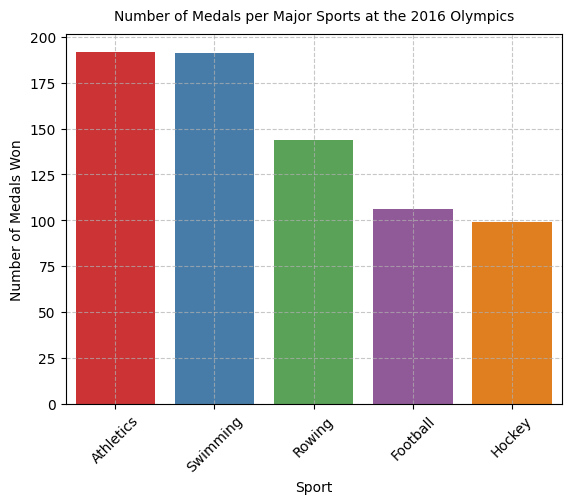

In [261]:
ax = sns.barplot(x='Sport', y='Medals', palette='Set1',data=sum_per_sport)
ax.set_title('Number of Medals per Major Sports at the 2016 Olympics',pad=10,fontsize= 10)
ax.set_ylabel("Number of Medals Won", fontsize=10)
ax.tick_params(axis='x', rotation=45)
ax.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Ejercicio 2

Para este ejercicio, se solicita trazar un gráfico que represente la distribución de la edad de los ganadores de medallas en los cinco principales deportes en las Olimpiadas de 2016. Para ello, podemos utilizar los datos filtrados inicialmente y generar el histograma haciendo uso de la librería `Seaborn`. Adicionalmente, se presentan la media aritmética (Mean; línea en rojo) y la mediana (Median; línea en naranja) para resumir la edad de los atletas:

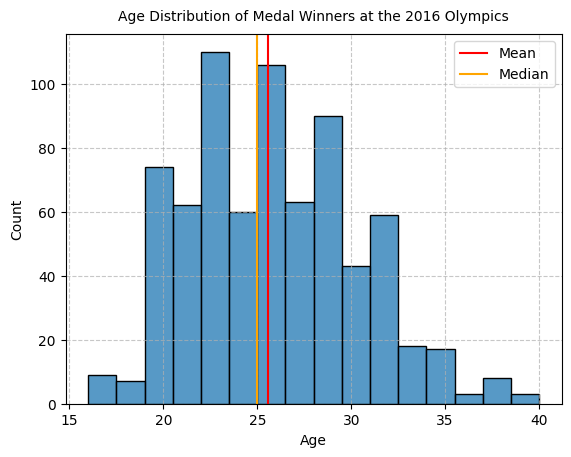

In [231]:
sns.histplot(filtered_df.Age, fill=True)
plt.axvline(x=np.mean(filtered_df.Age), color='red', label='Mean')
plt.axvline(x=np.median(filtered_df.Age), color='orange', label='Median')
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Age Distribution of Medal Winners at the 2016 Olympics', pad=10,fontsize=10)
plt.show()

### Ejercicio 3

Para el tercer ejercicio de esta sección, se solicita determinar qué equipos nacionales ganaron el mayor número de medallas en los cinco principales deportes en las Olimpiadas de 2016. Para ello, se comienza agrupando los datos filtrados en función de los equipos y el deporte, y luego se seleccionan los cinco equipos que ganaron más medallas en cada deporte:

In [266]:
grouped = filtered_df .groupby(['Sport', 'Team'])['Is_Medal'].sum().reset_index()
grouped = grouped.sort_values(['Sport', 'Is_Medal'], ascending=[True, False])
top_teams_per_sport = grouped.groupby('Sport').head(3) # take the top three medal-winning teams in each sport
print(top_teams_per_sport)

        Sport           Team  Is_Medal
40  Athletics  United States        46
23  Athletics        Jamaica        30
19  Athletics  Great Britain        14
44   Football        Germany        35
43   Football         Canada        18
45   Football        Nigeria        18
49     Hockey        Germany        33
47     Hockey      Argentina        18
48     Hockey        Belgium        16
61     Rowing  Great Britain        26
60     Rowing        Germany        17
65     Rowing    Netherlands        15
93   Swimming  United States        71
73   Swimming      Australia        32
77   Swimming         Canada        15


Text(0, 0.5, 'Number of Medals')

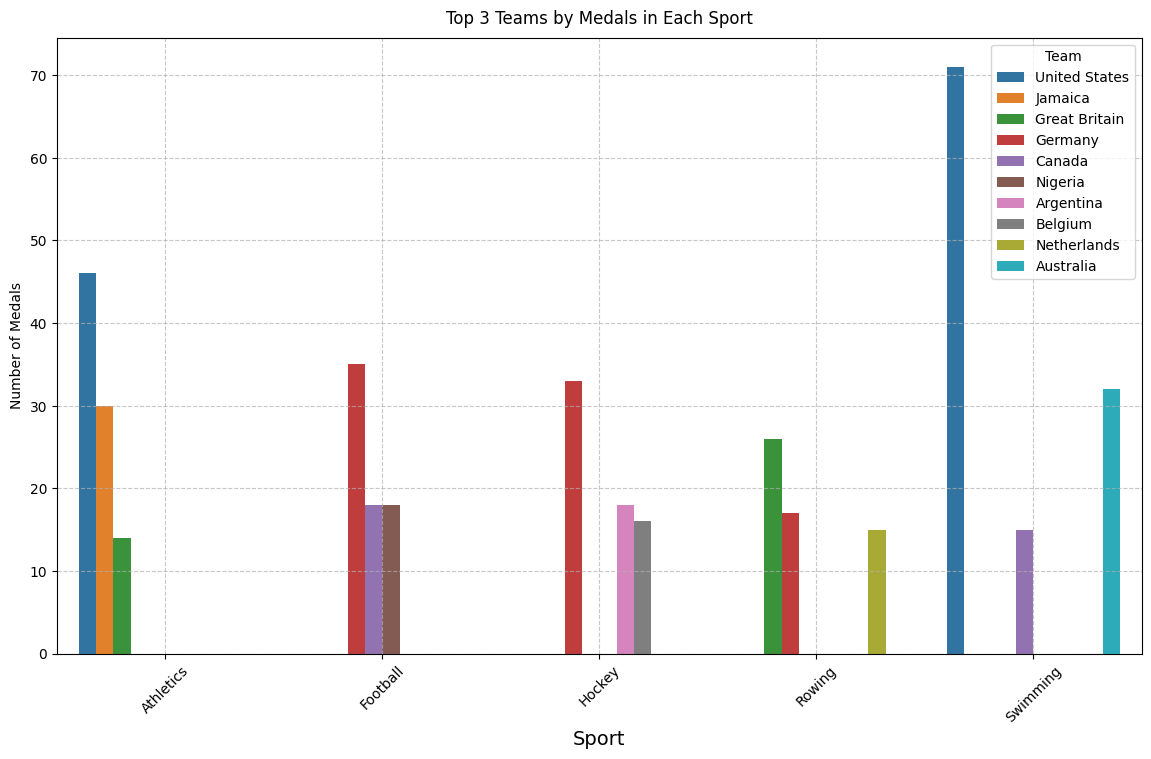

In [300]:
plt.figure(figsize=(14, 8)) 
ax = sns.barplot(x='Sport', y='Is_Medal', hue='Team', data=top_teams_per_sport)
ax.set_title('Top 3 Teams by Medals in Each Sport', fontsize=12, pad = 10)
ax.set_xlabel('Sport', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.7)
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('Number of Medals', fontsize=10)

Con el fin de detallar, se presentan diagramas de barras que muestran los 10 equipos que ganaron más medallas en cada uno de los deportes:

In [257]:
athletics_df = filtered_df[filtered_df['Sport'] == 'Athletics']

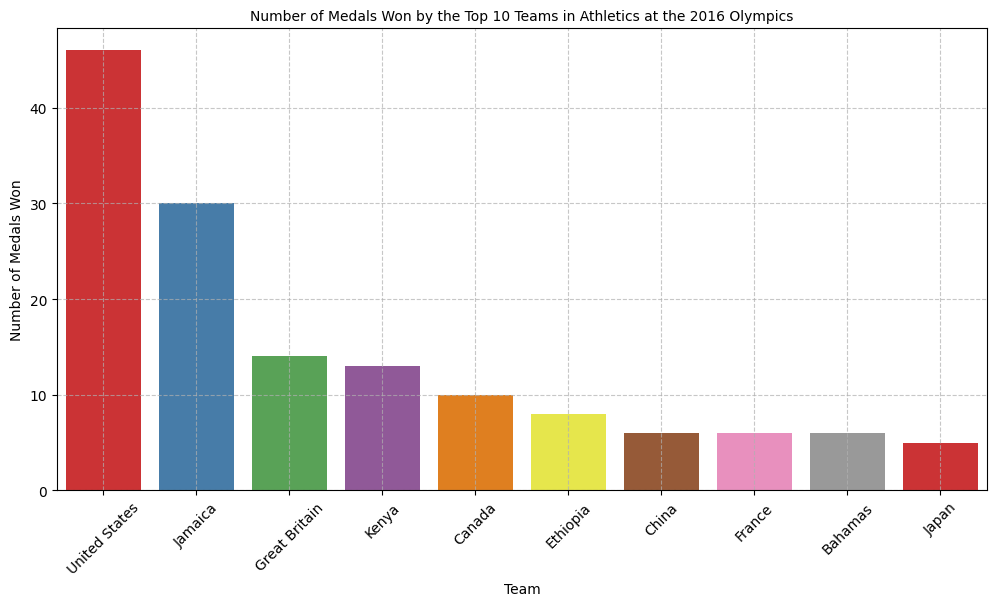

In [273]:
plt.figure(figsize=(12, 6))
grouped = athletics_df.groupby(['Team'])
sum_per_sport = pd.DataFrame(grouped['Is_Medal'].sum())
sum_per_sport = sum_per_sport.sort_values('Is_Medal', ascending=False)
sum_per_sport = sum_per_sport.head(10)
ax = sns.barplot(x='Team', y='Is_Medal',palette='Set1', data=sum_per_sport)
ax.set_title('Number of Medals Won by the Top 10 Teams in Athletics at the 2016 Olympics',fontsize=10)
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_ylabel("Number of Medals Won", fontsize=10)
ax.tick_params(axis='x', rotation=45)
plt.show()

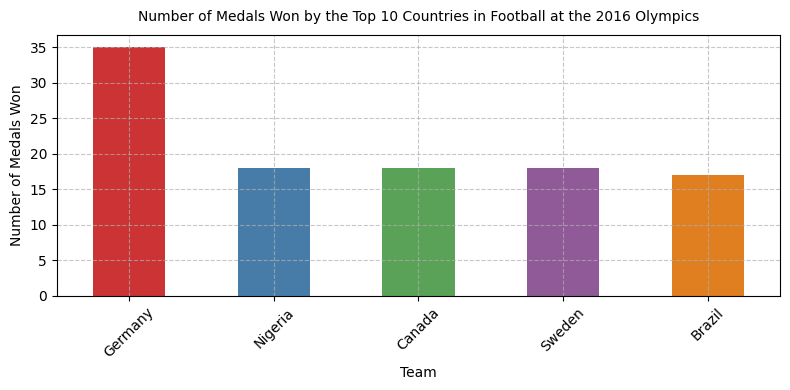

In [269]:
Football_df = filtered_df[filtered_df['Sport'] == 'Football']
grouped = Football_df.groupby(['Team'])
sum_per_sport = pd.DataFrame(grouped['Is_Medal'].sum())
sum_per_sport = sum_per_sport.sort_values('Is_Medal', ascending=False)
sum_per_sport = sum_per_sport.head(10)

plt.figure(figsize=(8, 4))
ax = plt.gca()

sns.barplot(x='Team', y='Is_Medal',palette='Set1', data=sum_per_sport, ax=ax)
bar_width = 0.5  # Desired bar width
for bar in ax.patches:
    bar.set_width(bar_width)
    bar.set_x(bar.get_x() + 0.15)

# Adjust x-axis labels
ax.set_xticks(np.arange(len(sum_per_sport.index)))
ax.set_xticklabels(sum_per_sport.index, rotation=45)

ax.set_title('Number of Medals Won by the Top 10 Countries in Football at the 2016 Olympics', pad = 10,fontsize=10)
ax.set_ylabel("Number of Medals Won", fontsize=10)
ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

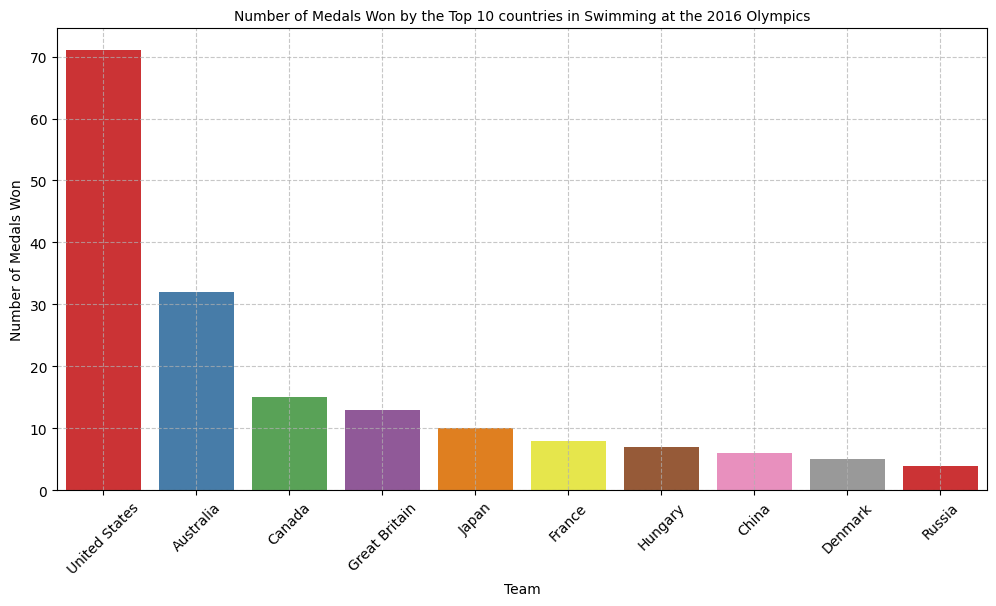

In [270]:
plt.figure(figsize=(12, 6))
Swimming_df = filtered_df[filtered_df['Sport'] == 'Swimming']
grouped = Swimming_df.groupby(['Team'])
sum_per_sport = pd.DataFrame(grouped['Is_Medal'].sum())
sum_per_sport = sum_per_sport.sort_values('Is_Medal', ascending=False)
sum_per_sport = sum_per_sport.head(10)
ax = sns.barplot(x='Team', y='Is_Medal',palette='Set1', data=sum_per_sport)
ax.set_title('Number of Medals Won by the Top 10 countries in Swimming at the 2016 Olympics',fontsize=10)
ax.set_ylabel("Number of Medals Won", fontsize=10)
ax.grid(True, linestyle='--', alpha=0.7)
ax.tick_params(axis='x', rotation=45)
plt.show()

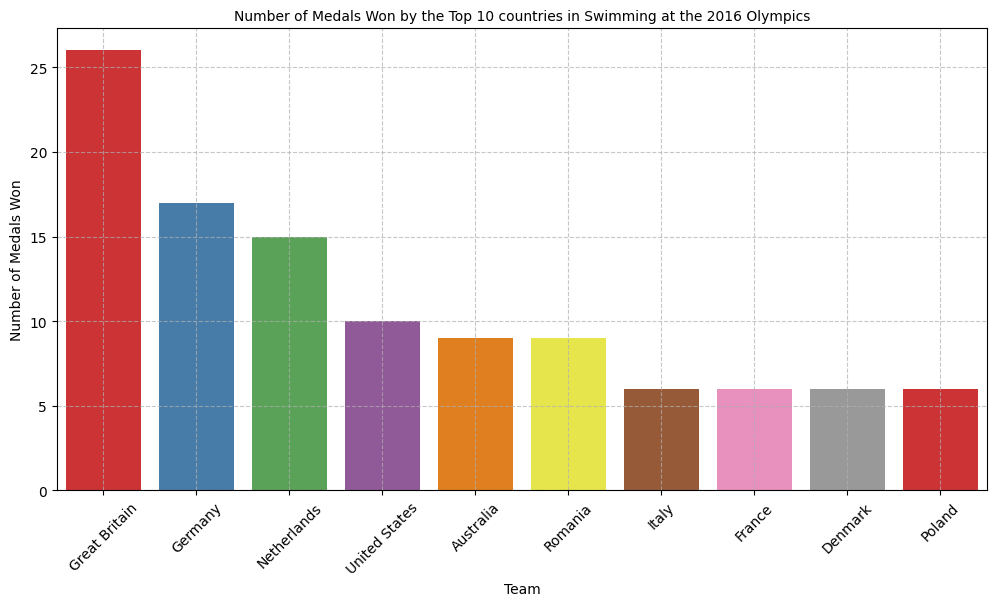

In [271]:
plt.figure(figsize=(12, 6))
Rowing_df = filtered_df[filtered_df['Sport'] == 'Rowing']
grouped = Rowing_df.groupby(['Team'])
sum_per_sport = pd.DataFrame(grouped['Is_Medal'].sum())
sum_per_sport = sum_per_sport.sort_values('Is_Medal', ascending=False)
sum_per_sport = sum_per_sport.head(10)
ax = sns.barplot(x='Team', y='Is_Medal',palette='Set1', data=sum_per_sport)
ax.set_title('Number of Medals Won by the Top 10 countries in Swimming at the 2016 Olympics',fontsize=10)
ax.set_ylabel("Number of Medals Won", fontsize=10)
ax.grid(True, linestyle='--', alpha=0.7)
ax.tick_params(axis='x', rotation=45)
plt.show()

### Ejercicio 4

En el ejercicio final de este apartado, se solicita observar la tendencia del peso medio de los atletas masculinos y femeninos ganadores en los cinco principales deportes en 2016. Para ello, se utiliza un diagrama de barras agrupadas para visualizar la tendencia en el peso de los atletas en cada una de las condiciones. En este caso, se emplea la mediana como estimador del valor medio debido a que se desconoce la distribución del peso y es posible que existan datos atípicos. Adicionalmente, se presentan intervalos de confianza del 95% para dicho estimador:

In [8]:
grouped_sex = filtered_df.groupby(['Sex', 'Sport']).agg({
    'Weight': 'mean' 
}).reset_index()

Text(0, 0.5, 'Sport')

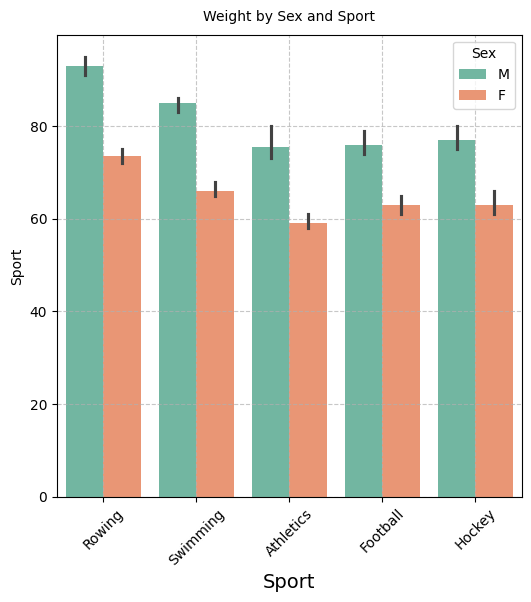

In [263]:
plt.figure(figsize=(6, 6)) 
ax = sns.barplot(x='Sport', y='Weight', hue='Sex',palette='Set2', data=filtered_df, estimator = np.median, ci = 95)
# Add title and labels
ax.set_title('Weight by Sex and Sport',pad=10,fontsize= 10)
ax.set_xlabel('Sport', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.7)
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('Weight (kg)')
ax.set_ylabel('Sport', fontsize= 10)

También es posible visualizar el peso en función del deporte utilizando el gráfico de cajas y bigotes. Este gráfico ofrece información más detallada sobre la distribución del peso y permite determinar si existen datos extremos o atípicos. Tal como se verá a continuación, la selección de la mediana como estimador del valor medio fue acertada debido a que se presentan datos extremos en algunas de las condiciones analizadas:

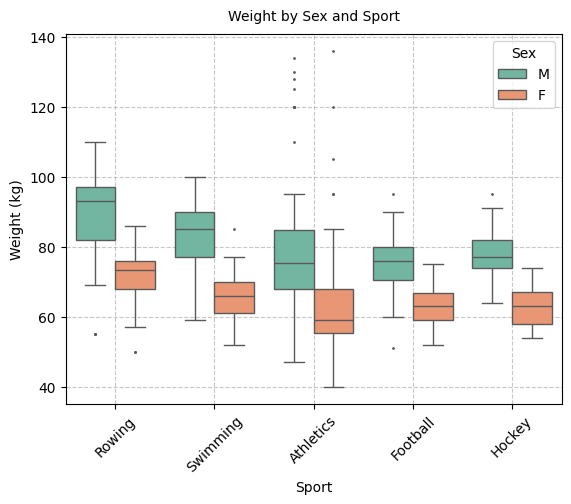

In [254]:
flierprops = dict(marker='o', color='black', markersize=1, linestyle='none')
ax2 = sns.boxplot(x='Sport', y='Weight', hue='Sex', palette='Set2', data=filtered_df,flierprops=flierprops)
ax2.set_title('Weight by Sex and Sport',pad=10,fontsize= 10)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylabel('Weight (kg)')
plt.show()

## Vizualisación Estática

En esta sección se solicita crear un gráfico utilizando una técnica de visualización adecuada que presente de la mejor manera posible el patrón global de las características de `height` y `weight` de los ganadores de medallas de 2016 en los cinco deportes principales. Para ello, podemos comenzar generando dos diagramas de cajas y bigotes con el fin de estudiar las distribuciones en cada uno de los cinco deportes principales:

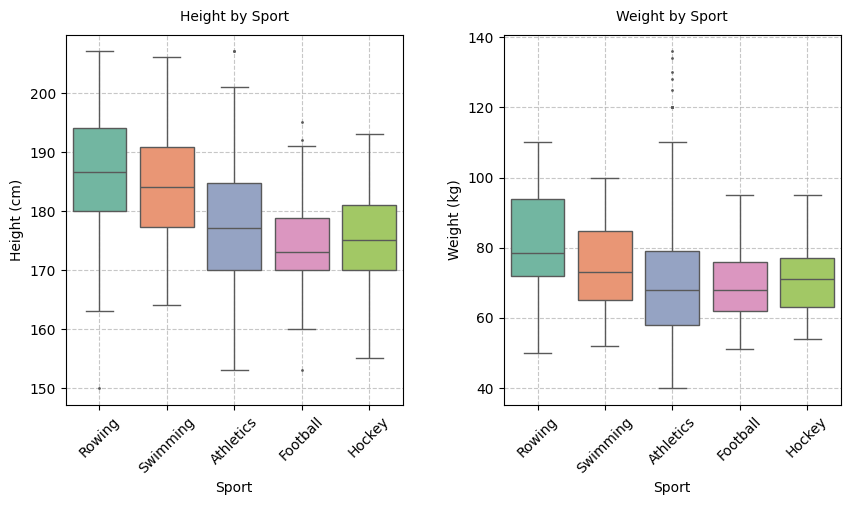

In [301]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot boxplot for height
sns.boxplot(x='Sport', y='Height', data=filtered_df, ax=axes[0], palette='Set2', flierprops=flierprops)
axes[0].set_title('Height by Sport', pad=10, fontsize=10)
axes[0].set_xlabel('Sport')
axes[0].set_ylabel('Height (cm)')
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].tick_params(axis='x', rotation=45)

# Plot boxplot for weight
sns.boxplot(x='Sport', y='Weight', data=filtered_df, ax=axes[1], palette='Set2', flierprops=flierprops)
axes[1].set_title('Weight by Sport', pad=10, fontsize=10)
axes[1].set_xlabel('Sport')
axes[1].set_ylabel('Weight (kg)')
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
fig.subplots_adjust(top=0.85, wspace=0.3)
plt.show()

También podemos usar un gráfico de dispersión para examinar la relación entre el `weight` y la `height` de los atletas que ganaron medallas en los Juegos Olímpicos de 2016. Adicionalmente, podemos codificar con colores cada uno de los deportes principales:

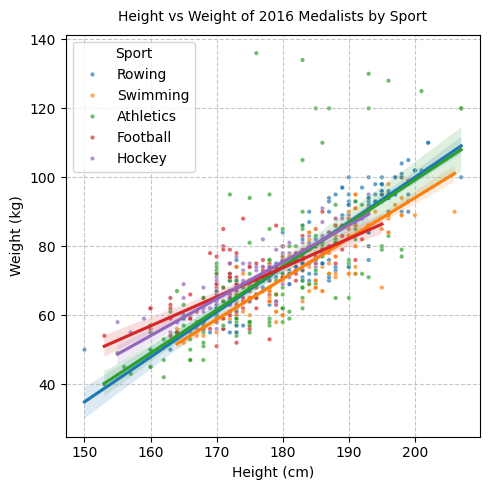

In [302]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.scatterplot(data=filtered_df, x='Height', y='Weight', hue='Sport', alpha=0.7, ax=ax, legend=True, s=10)

medal_categories = filtered_df['Sport'].unique()
for medal in medal_categories:
    subset = filtered_df[filtered_df['Sport'] == medal]
    sns.regplot(data=subset, x='Height', y='Weight', scatter=False, ax=ax, label=None)  # No label for regression lines

ax.set_xlabel('Height (cm)')
ax.set_ylabel('Weight (kg)')
plt.title('Height vs Weight of 2016 Medalists by Sport', pad=10, fontsize=10)

handles, labels = ax.get_legend_handles_labels()
# Move scatterplot legend to the upper left
ax.legend(handles, labels, title='Sport', loc='upper left')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

En esta sección también se solicita crear un gráfico utilizando una técnica de visualización adecuada que presente de la mejor manera posible la estadística de resumen para la `height` y el `weight` de los jugadores que ganaron cada tipo de medalla (oro/plata/bronce) en los datos. Para ello, podemos proceder de manera similar, generando dos gráficos de cajas para el estudio inicial de la distribución del `weight` y la `height` en cada una de las condiciones, y posteriormente estudiar la relación entre ambas variables utilizando un gráfico de dispersión:

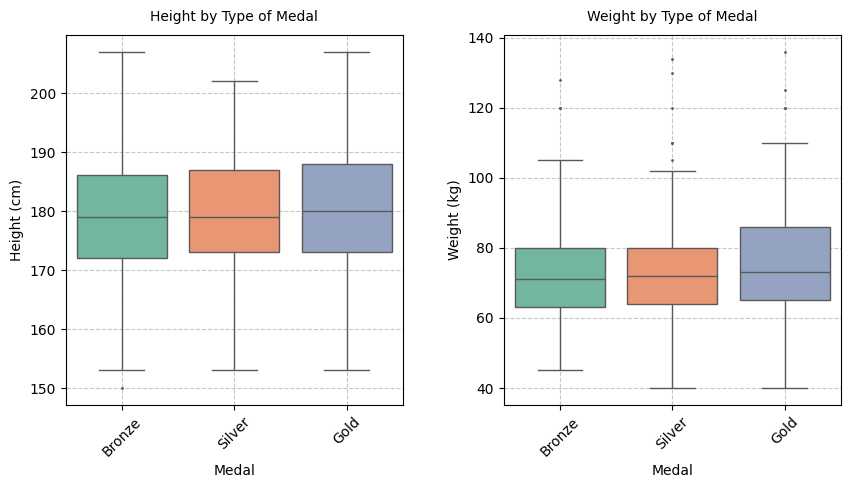

In [303]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=False)

# Plot boxplot for Height by Medal
sns.boxplot(x='Medal', y='Height', data=filtered_df, ax=axes[0], palette='Set2', flierprops=flierprops)
axes[0].set_title('Height by Type of Medal', pad=10, fontsize=10)
axes[0].set_xlabel('Medal')
axes[0].set_ylabel('Height (cm)')
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].tick_params(axis='x', rotation=45)

# Plot boxplot for Weight by Medal
sns.boxplot(x='Medal', y='Weight', data=filtered_df, ax=axes[1], palette='Set2', flierprops=flierprops)
axes[1].set_title('Weight by Type of Medal', pad=10, fontsize=10)
axes[1].set_xlabel('Medal')
axes[1].set_ylabel('Weight (kg)')
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].tick_params(axis='x', rotation=45)

fig.subplots_adjust(top=0.85, wspace=0.3)
plt.show() 

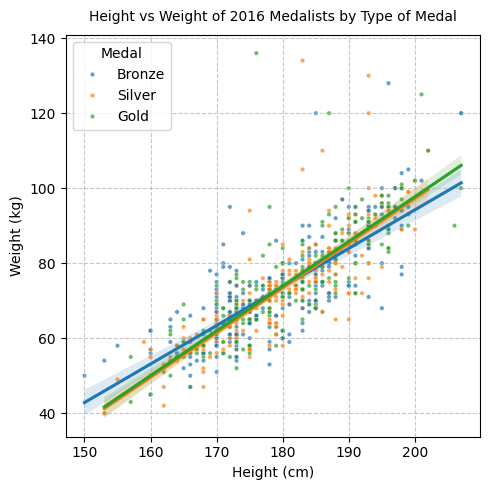

In [304]:
fig, ax = plt.subplots(figsize=(5, 5))

# Scatter plot with color coding by Medal
sns.scatterplot(data=filtered_df, x='Height', y='Weight', hue='Medal', alpha=0.7, ax=ax, legend=True, s=10)

# Add regression lines for each Medal category
medal_categories = filtered_df['Medal'].unique()
for medal in medal_categories:
    subset = filtered_df[filtered_df['Medal'] == medal]
    sns.regplot(data=subset, x='Height', y='Weight', scatter=False, ax=ax, label=None)  # No label for regression lines

ax.set_xlabel('Height (cm)')
ax.set_ylabel('Weight (kg)')
plt.title('Height vs Weight of 2016 Medalists by Type of Medal', pad=10, fontsize=10)

# Adjust the legend position
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Medal', loc='upper left')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Con el fin de examinar de manera más detallada el `weight` y la `height` de los ganadores de medallas, generamos dos gráficos de cajas y bigotes adicionales. Esta vez discriminando el tipo de medalla y el sexo del atleta:

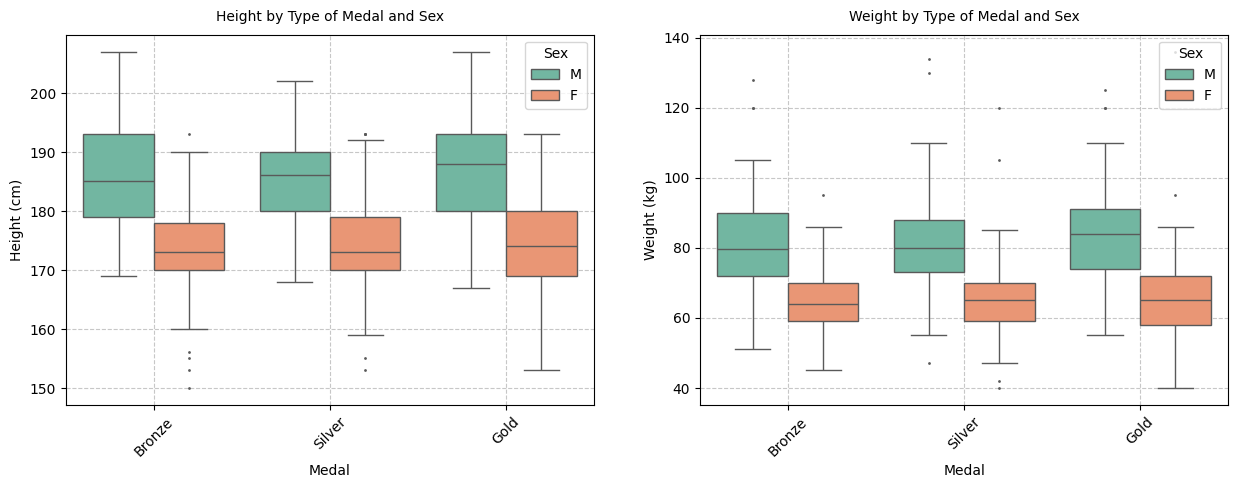

In [305]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)

# Plot boxplot for Height by Medal and Sex
sns.boxplot(x='Medal', y='Height', hue='Sex', data=filtered_df, ax=axes[0], palette='Set2', flierprops=flierprops)
axes[0].set_title('Height by Type of Medal and Sex', pad=10, fontsize=10)
axes[0].set_xlabel('Medal')
axes[0].set_ylabel('Height (cm)')
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(loc='upper right', fontsize=10, title='Sex')

# Plot boxplot for Weight by Medal and Sex
sns.boxplot(x='Medal', y='Weight', hue='Sex', data=filtered_df, ax=axes[1], palette='Set2', flierprops=flierprops)
axes[1].set_title('Weight by Type of Medal and Sex', pad=10, fontsize=10)
axes[1].set_xlabel('Medal')
axes[1].set_ylabel('Weight (kg)')
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(loc='upper right', fontsize=10, title='Sex')

fig.subplots_adjust(top=0.85, wspace=0.2)
plt.show()

En ambos gráficos de dispersión se puede apreciar cierta correlación entre la `height` y el `weight` de los atletas. Esto es común en estudios que examinan las medidas antropométricas del cuerpo humano. Por ello, es habitual calcular el índice de masa corporal (BMI) en la investigación médica:

$$
BMI = \frac{\text{weight (kg)}}{\text{height (m)}^2}
$$

In [85]:
# Calculate BMI
filtered_df['Height_m'] = filtered_df['Height'] / 100
filtered_df['BMI'] = filtered_df['Weight'] / (filtered_df['Height_m'] ** 2)

También podemos visualizar la distribución del BMI en cada una de las condiciones de interés, tal como se hizo con la `height` y el `weight` de manera independiente:

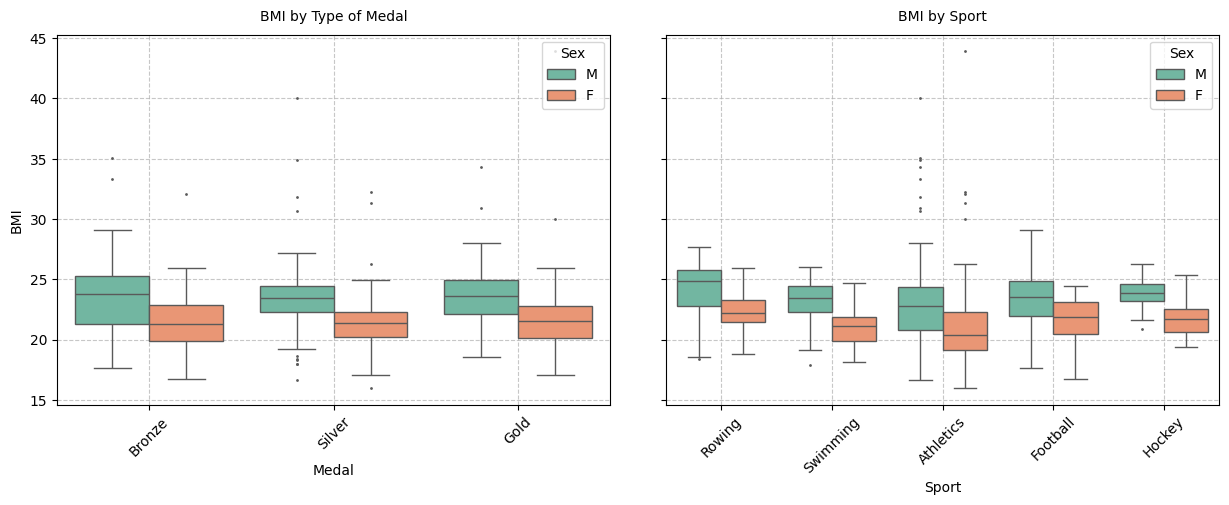

In [296]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5),sharey=True)
sns.boxplot(x='Medal', y='BMI', hue = 'Sex', data=filtered_df, ax=axes[0], palette='Set2', flierprops=flierprops)
axes[0].set_title('BMI by Type of Medal',pad=10,fontsize=10)
axes[0].set_xlabel('Medal')
axes[0].set_ylabel('BMI')
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(loc='upper right', fontsize = 10,title='Sex')

# Plot boxplot for Sport with customized outliers
sns.boxplot(x='Sport', y='BMI',hue = 'Sex', data=filtered_df, ax=axes[1], palette='Set2', flierprops=flierprops)
axes[1].set_title('BMI by Sport',pad=10,fontsize=10)
axes[1].set_xlabel('Sport')
axes[1].set_ylabel('BMI')
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(loc='upper right', fontsize = 10,title='Sex')

fig.subplots_adjust(top=0.85, wspace=0.1) 